# stock2_index
## 概要
* yahoo financeより株価データを取得する
* 調整済み終値、5日,25日,50日単純移動平均、出来高をグラフ化する
* MACDをグラフ化する
* RSIをグラフ化する
* ボリンジャーバンドをグラフ化する
## 参考
### キノコード：株価のデータ分析(2)
* https://youtu.be/-x88kBpG0Bw
* https://kino-code.com/python_automation_stock_analysis2/
### install packages
* TA-Libのインストール:https://optrip.xyz/?p=2242

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
# 日経平均データ(^N225)の取得
ticker = '^N225'
start = '2019-07-01'
end = '2020-07-01'

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


### 移動平均線
- ある一定期間の価格から平均値を計算し、折れ線グラフで表したもの
- 移動平均線が上向きなら上昇トレンド、下向きなら下降レンドと判断される
- 短期移動平均線が長期移動平均線を下から上へ突き抜けることをゴールデンクロスといい、直近の価格傾向が上向きに転じたとみられる買いサインとされる
- 短期移動平均線が長期移動平均線を下から上へ突き抜けることをデッドクロスといい、直近の価格傾向が下向きに転じたとみられる売りサインとされる

In [3]:
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()

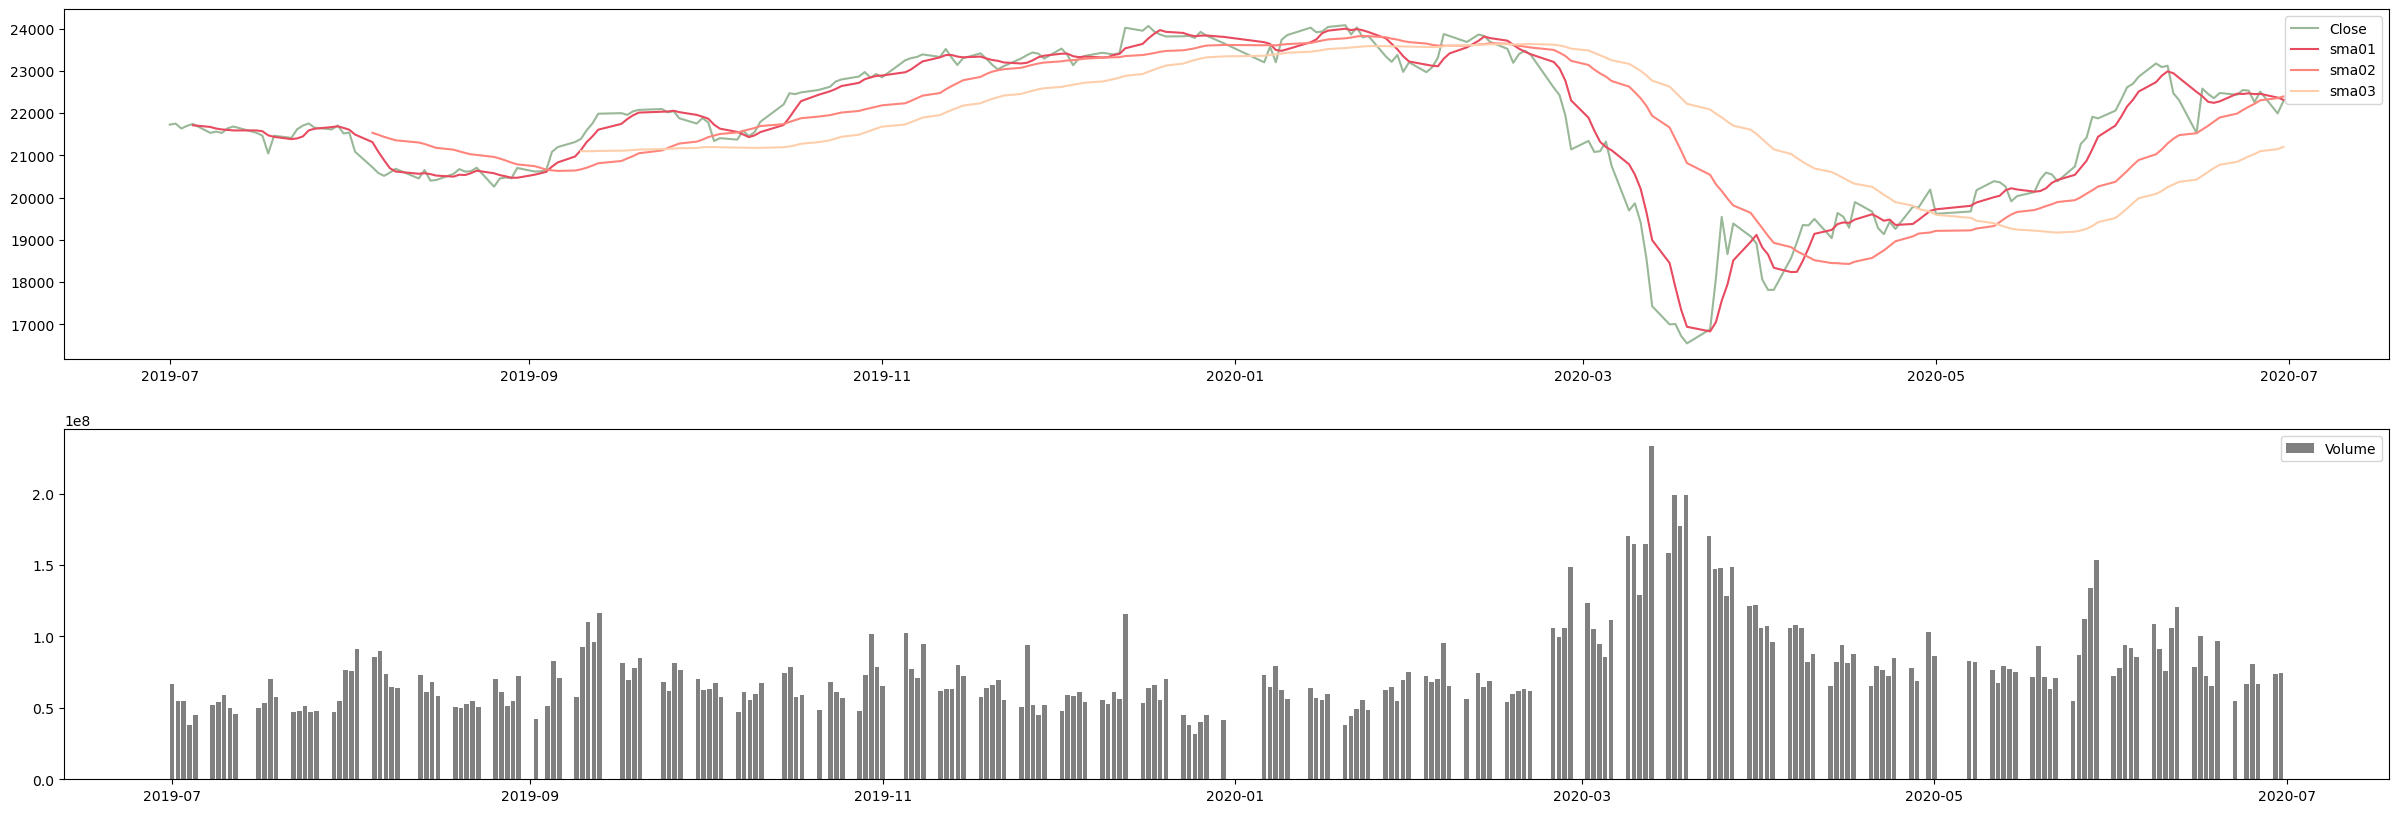

In [4]:
plt.figure(figsize=(30, 10))
plt.subplot(2,1,1)
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

### MACD
* トレンドを見る指標
* 0以上なら上昇トレンド
* 0以下なら下降トレンド

In [5]:
#macd, macdsignal, macdhist = ta.MACD(np.array(df.Close), fastperiod=span01, slowperiod=span02, signalperiod=span01)
macd, macdsignal, macdhist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
# <MACD>, <MACDシグナル>, <MACDヒストグラム用データ> = ta.MACD(<対象データ>, <短期移動平均>, <長期移動平均>, <MACDシグナル>)
df['macd'] = macd
df['macdsignal'] = macdsignal
df['macdhist'] = macdhist

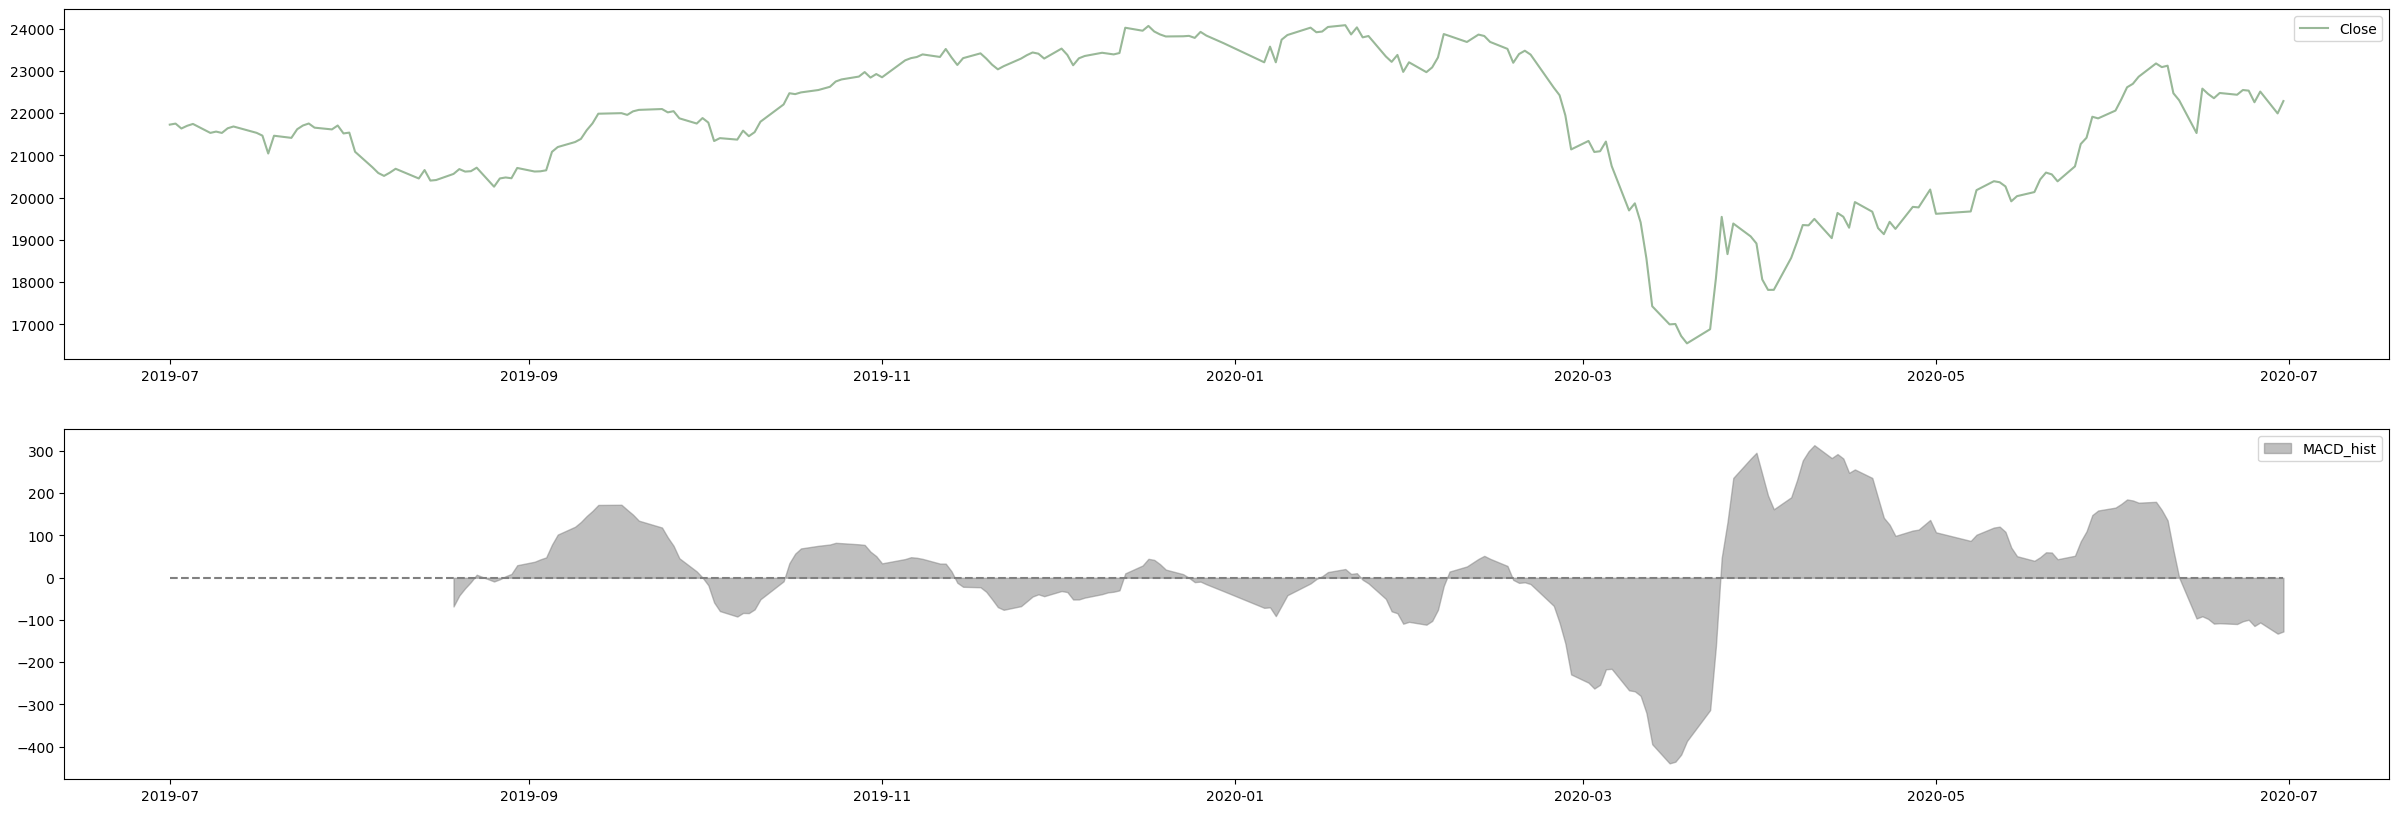

In [6]:
plt.figure(figsize=(30, 10))
plt.subplot(2,1,1)
plt.plot(date,close,label='Close',color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color='gray', alpha=0.5, label='MACD_hist')
xmin = df.index.min()
xmax = df.index.max()
plt.hlines(0, xmin, xmax, 'gray', linestyles='dashed')
plt.legend()

### RSI
- 売られすぎ、買われすぎを判断する指標
- 20～30%を下回るとき、売られ過ぎ
- 70～80%を上回るとき、買われ過ぎ

In [7]:
df['RSI'] = ta.RSI(close, timeperiod=span02)

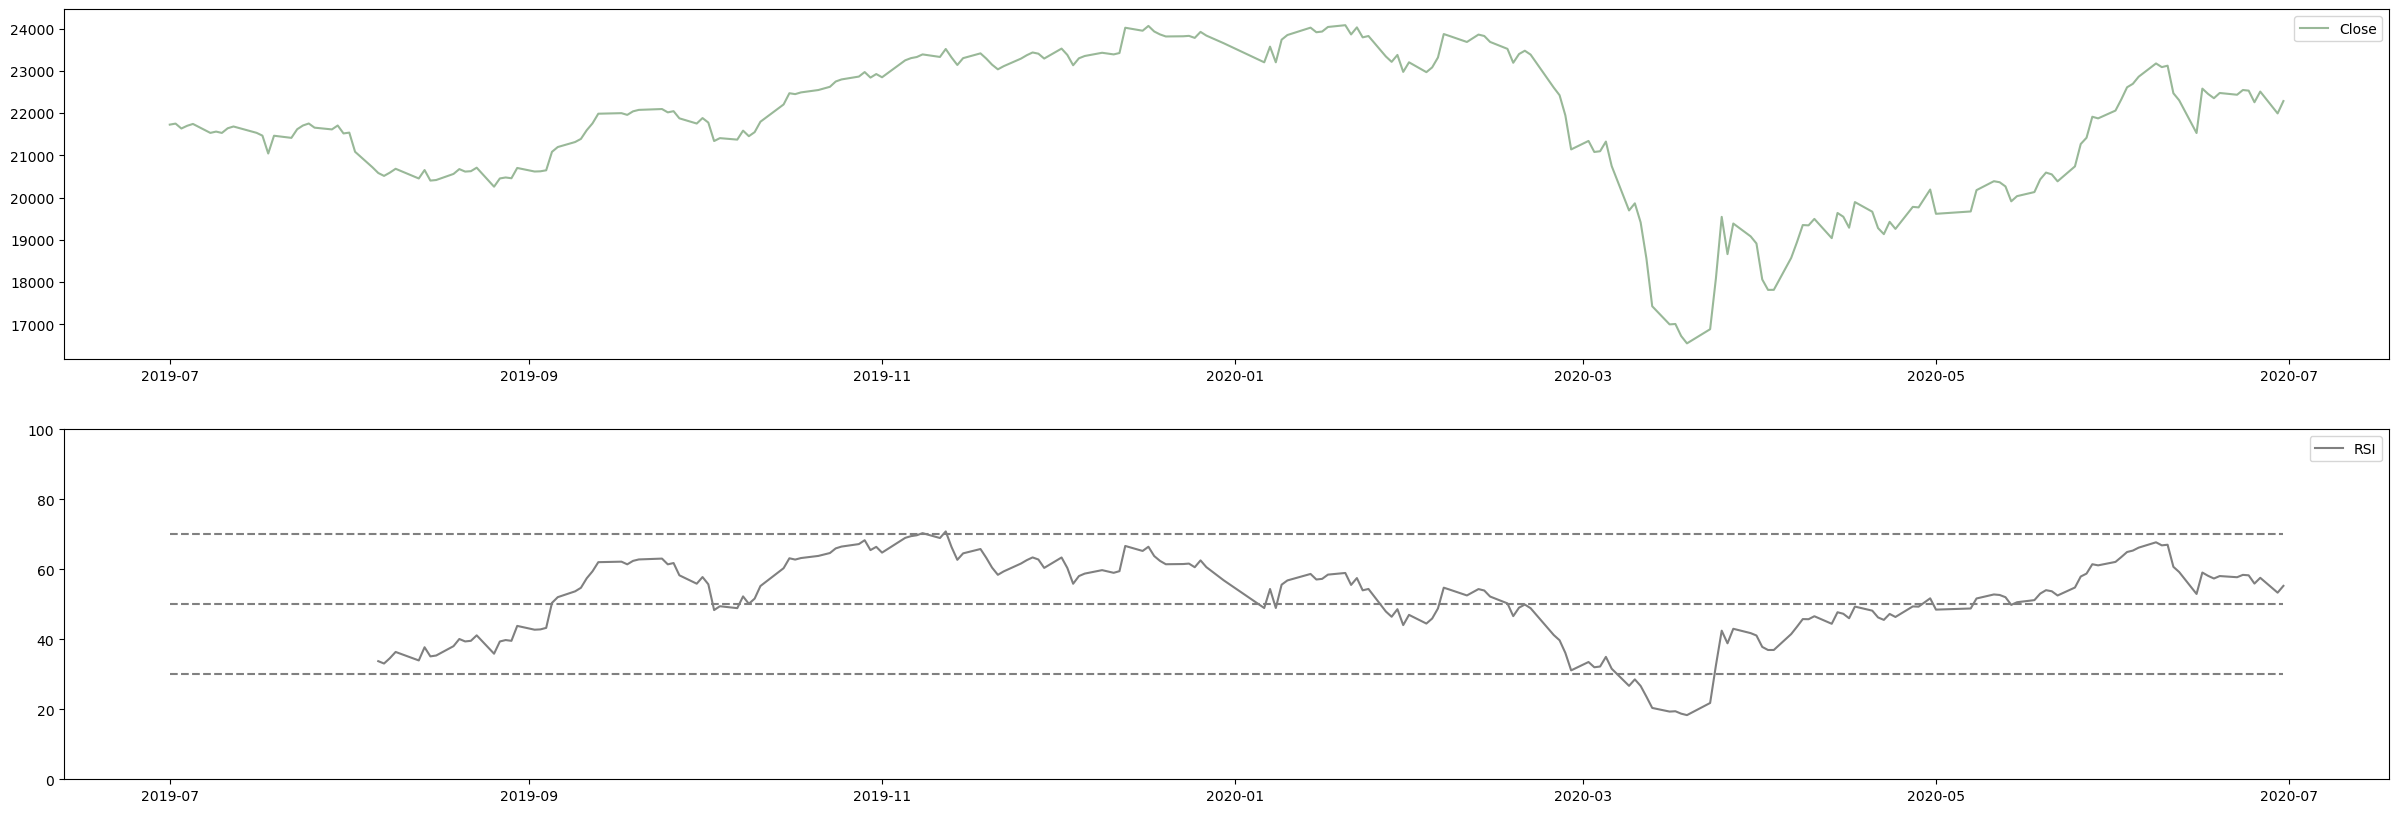

In [8]:
plt.figure(figsize=(30, 10))
plt.subplot(2,1,1)
plt.plot(date,close,label='Close',color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], xmin, xmax, 'gray', linestyles='dashed')
plt.legend()

### ボリンジャーバンド
- 売られすぎ、買われすぎを判断する指標
- 移動平均などの一定期間の平均に対して、一定期間の標準偏差を足したものと引いたもの
- 一般的にプラスマイナス標準偏差の2倍を使う（±2σ）
- 一般に、終値はこの2本のラインの間に収まると言われ（95.45%）、収まらなかった場合は売られ過ぎ、買われ過ぎと判断される

In [9]:
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)
# ta.BBANDS(<対象データ>, <移動平均期間>, <上ラインの標準偏差>, <下ラインの標準偏差>, <移動平均タイプ（0:単純移動平均）>)

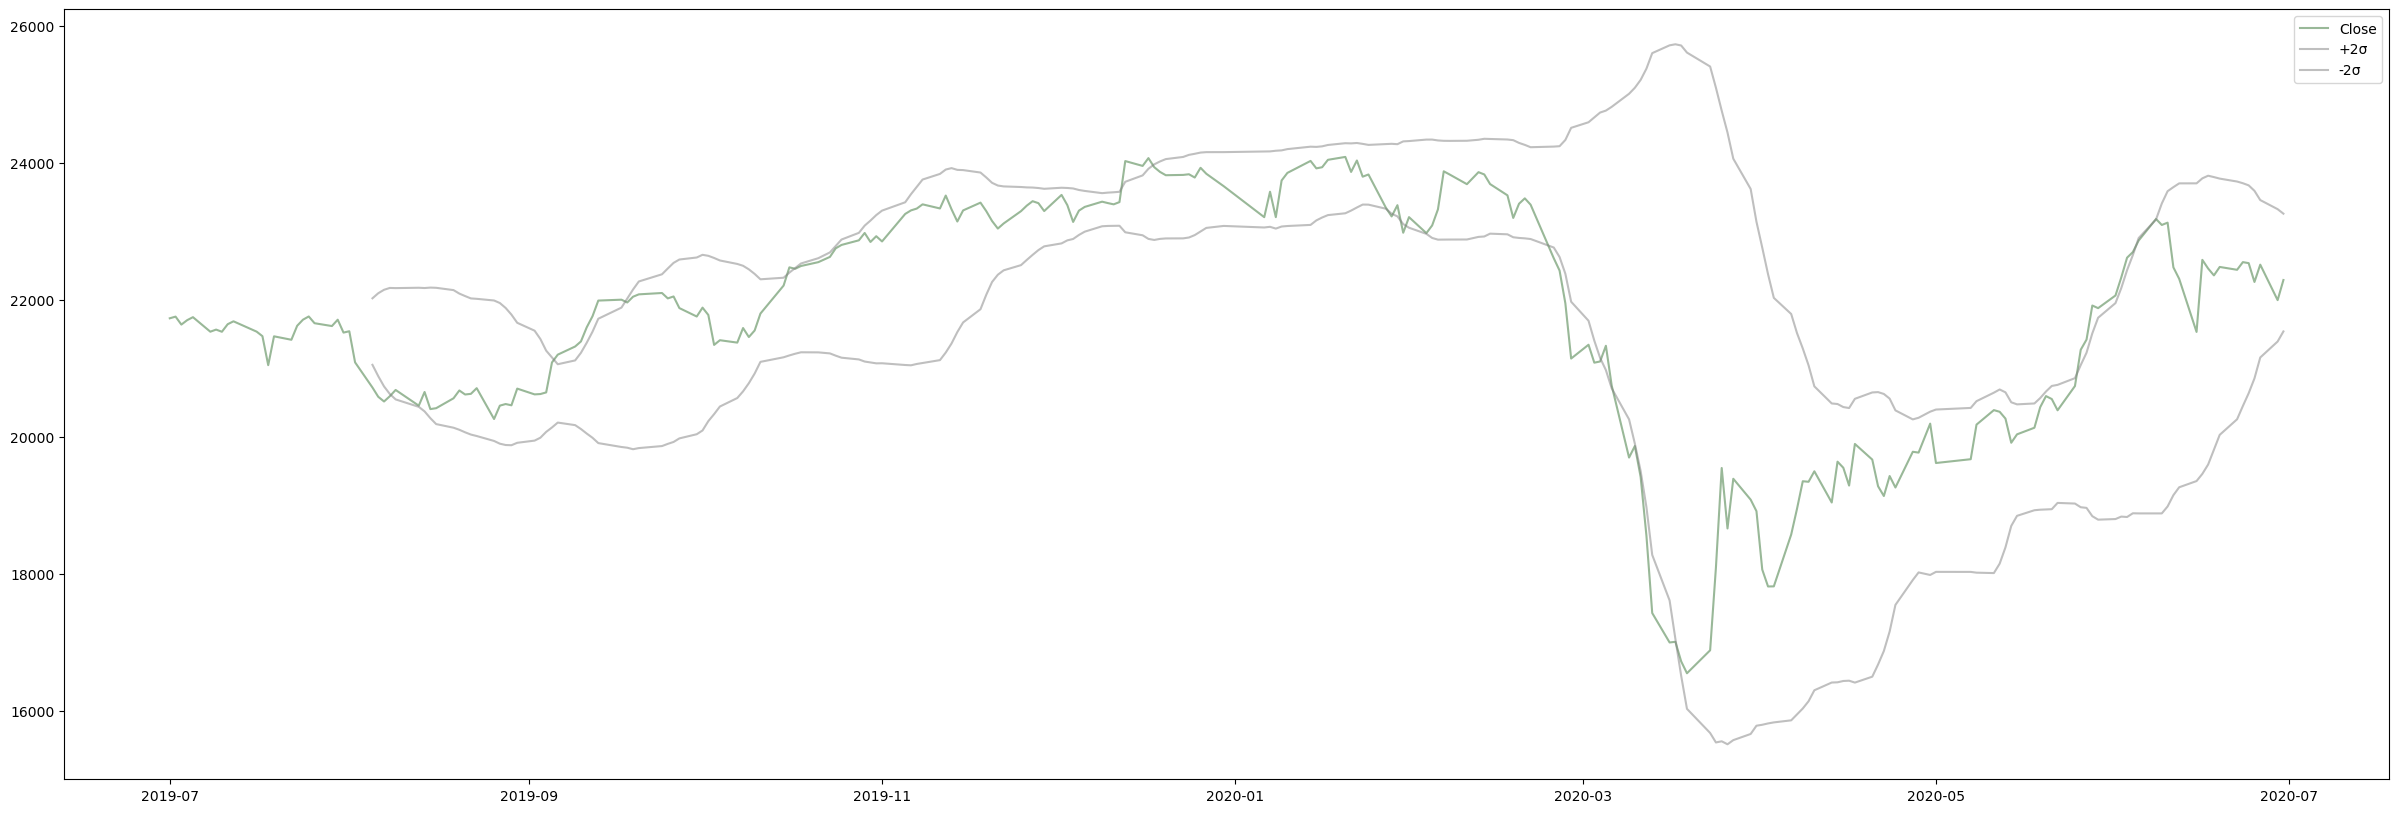

In [10]:
plt.figure(figsize=(30, 10))
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date, df['upper'], label='+2σ', color='gray', alpha=0.5)
plt.plot(date, df['lower'], label='-2σ', color='gray', alpha=0.5)
plt.legend()

In [11]:
# ビットコインデータ(BTC-JPY)
ticker = 'BTC-JPY'
start = '2020-01-01'
end = '2022-03-01'

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [12]:
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50
df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI'] = ta.RSI(close, timeperiod=span02)
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

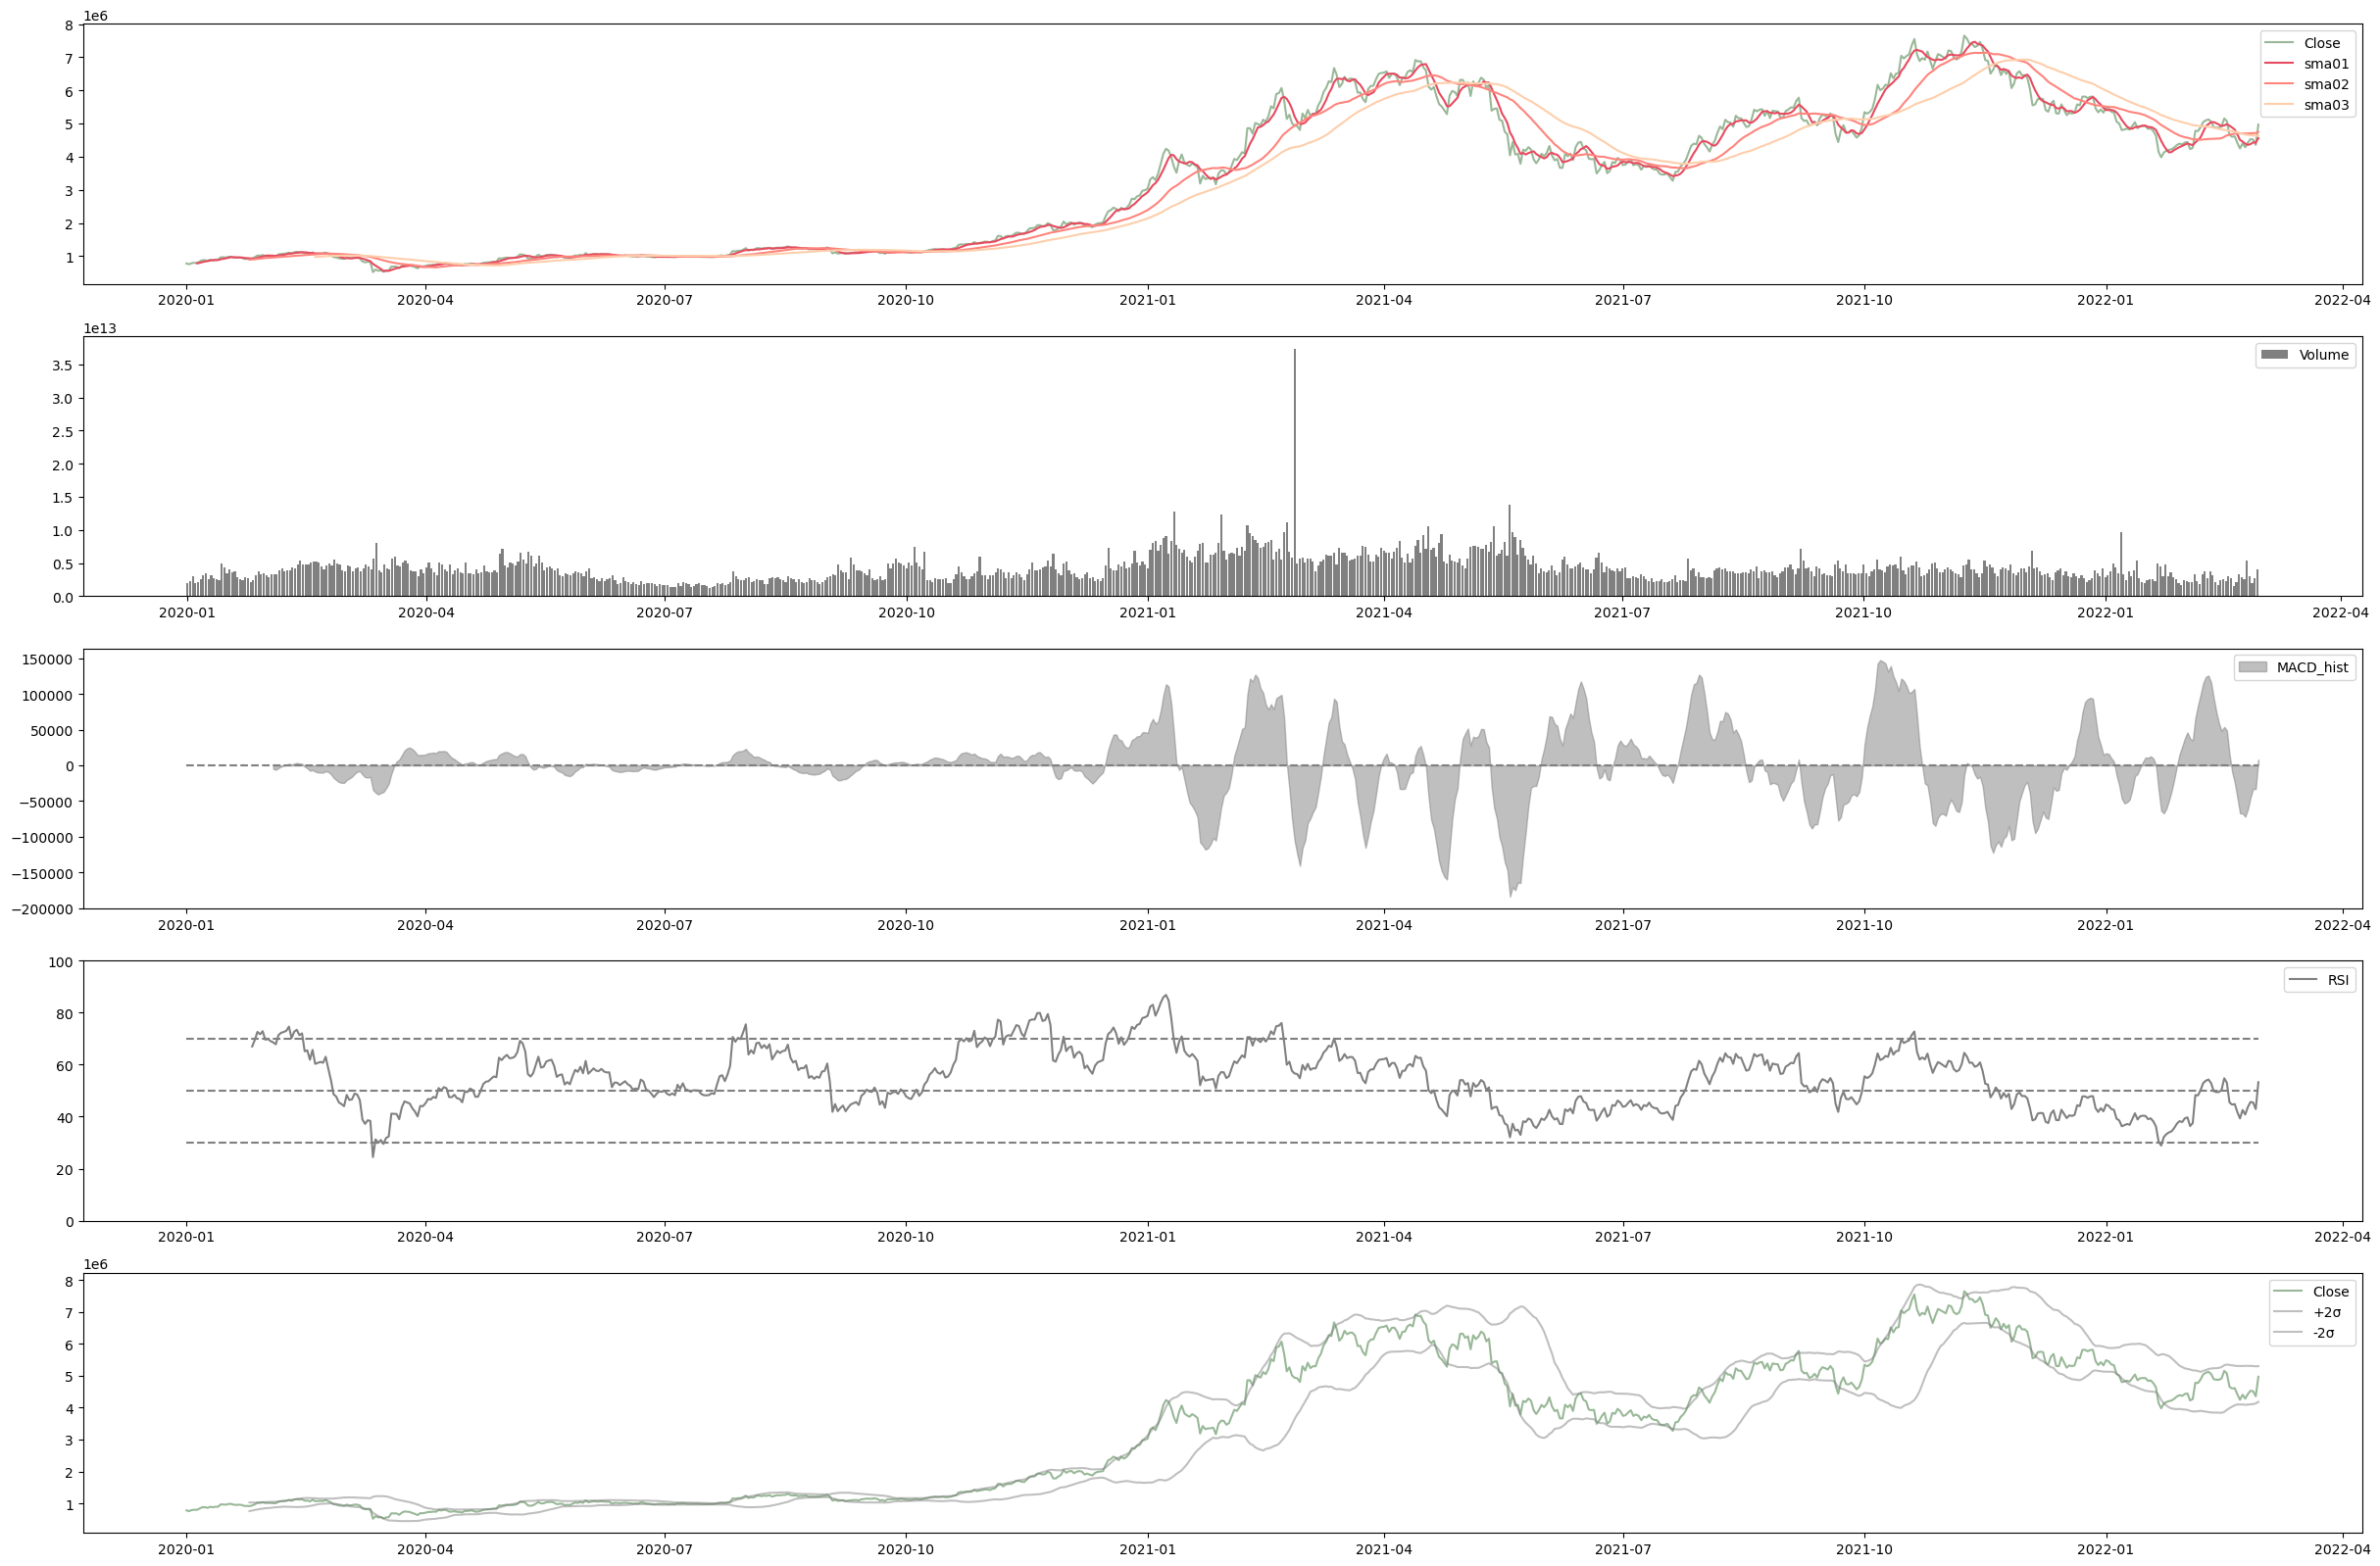

In [13]:
plt.figure(figsize=(30, 20))
plt.subplot(5,1,1)
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color='gray', alpha=0.5, label='MACD_hist')
xmin = df.index.min()
xmax = df.index.max()
plt.hlines(0, xmin, xmax, 'gray', linestyles='dashed')
plt.legend()

plt.subplot(5,1,4)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], xmin, xmax, 'gray', linestyles='dashed')
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date, df['upper'], label='+2σ', color='gray', alpha=0.5)
plt.plot(date, df['lower'], label='-2σ', color='gray', alpha=0.5)
plt.legend()